#### DSC630
###### Xin Tang
###### Week  4 ALS dataset classification
------------------

###### Data description and Goal
This datasets contains the anonymized data of patients with ALS (amyotrophic lateral sclerosis), The goal is to use clustering skills to classify data and reveal patterns.

In [1]:
# import data and do basic exam

import numpy as np
import pandas as pd

# Loading the data
df = pd.read_csv("als_data.csv")

# Check data load correctly
print(df.head(2))

   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk_median  trunk_min  \
0       143.0      0.017422        533          8           7.0          7   
1       136.0      0.010453        649          8           7.0          5   

   trunk_range  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min  
0     0.002646           6.0              6.0           6.0  
1     0.005386           7.0              5.0           5.0  

[2 rows x 101 columns]


In [2]:
## Check unique values and validate if data is clean
cols = df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} of unique values in {} column out of {}'.format(df[cols[i]].nunique(), cols[i], len(df)))
#print(Unique_Values())

print('variables with NA values', df.isna().sum())

variables with NA values ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64


In [2]:
# There are 2 columns are not relevant: 'ID' and 'SubjectID', remove them
#df.drop(columns = ['SubjectID'])
set = df.drop(['ID'], axis=1)
set = set.drop(['SubjectID'], axis=1)
print(set.head(2))

   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        65         57.0            40.5         38.0       0.066202   
1        48         45.0            41.0         39.0       0.010453   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.965608                30                 28.0                22   
1     -0.921717                37                 33.0                21   

   ALSFRS_Total_range  ...  Sodium_median  Sodium_min  Sodium_range  \
0            0.021164  ...          145.5       143.0      0.017422   
1            0.028725  ...          138.0       136.0      0.010453   

   trunk_max  trunk_median  trunk_min  trunk_range  Urine.Ph_max  \
0          8           7.0          7     0.002646           6.0   
1          8           7.0          5     0.005386           7.0   

   Urine.Ph_median  Urine.Ph_min  
0              6.0           6.0  
1              5.0           5.0  

[2 rows x 99 columns]


In [3]:
# normalization using standard scaler
from sklearn.preprocessing import StandardScaler
X = set.iloc[:].values

sc = StandardScaler()
newset =sc.fit_transform(X)

In [4]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Suspend the warning
import warnings
warnings.filterwarnings('ignore')

#create empyty list to hold coefficients for each K
K_coeff = []

# calculate the coefficients for K=2 to 15
for k in range(2,15):
    kmeans = KMeans(n_clusters =k)
    kmeans.fit(newset)
    score = silhouette_score(newset, kmeans.labels_)
    K_coeff.append(score)

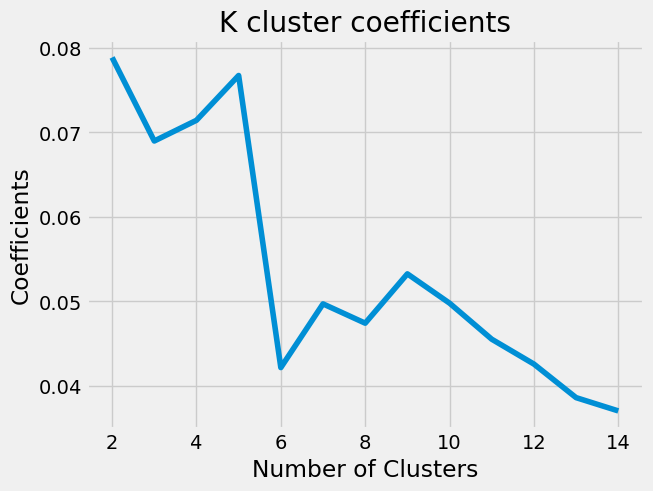

In [5]:
# Visualize the K and its coefficient

import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')
plt.plot(range(2,15), K_coeff)

plt.xlabel("Number of Clusters")
plt.ylabel("Coefficients")
plt.title("K cluster coefficients")
plt.show()


###### looks 2 or 5 clusters have the best coefficient, but the silhouette score are well below 0.5, so it means K-means may not be a good clustering method in this case. 

In [6]:
# Fit a K-means model to the data with the optimal number of clusters chosen, which is 2.
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [7]:
# Fit a PCA transformation with two features to the scaled data.
from sklearn.decomposition import PCA

pca =PCA(n_components=2).fit_transform(X)

# Add the two components into data frame
set['PCA1'] = pca[:, 0]
set['PCA2'] = pca[:, 1]

<Axes: xlabel='PCA1', ylabel='PCA2'>

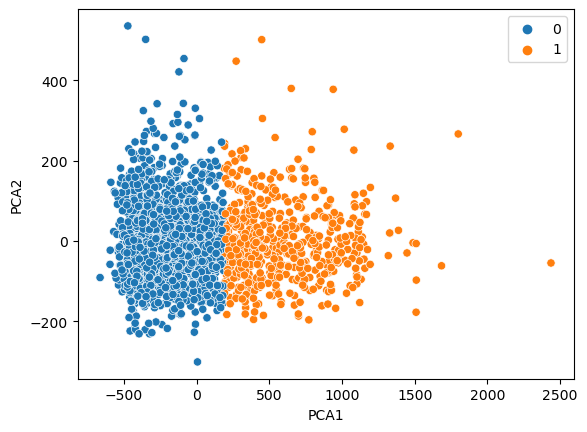

In [10]:
# Make a scatterplot of the PCA transformed data coloring each point by its cluster value.
import seaborn as sns

#sns.set(rc={'figure.figzie':(12,8)})
sns.scatterplot(data=set, x="PCA1", y="PCA2", hue = y_kmeans )

#### Conclusion:
1. I has no knowledge on symptoms of a ALS so can not tell which variables (or symptoms) are more important. 
2. This is a unsupervised learning, or classification
3. My analysis found it is best to categorized them into 2 groups, However, from the chart, the 2 group are not well separated, so it may not be much helpful. 

Resource: 
The dataset is provided by Bellevue university for use in DSC630 class.

In [13]:
pca_df = pd.DataFrame(data = pca, columns = ['PC 1', 'PC 2'])
print(pca_df)

             PC 1        PC 2
0      342.448355 -137.816704
1     -341.982580   21.963924
2      498.926606  -62.593579
3     -317.547108  -19.159625
4     1083.984979   92.445683
...           ...         ...
2218   135.028044  -65.590792
2219  -154.950909  -34.544828
2220   906.433388  -34.832447
2221  -124.336600  -24.376028
2222  -480.890375   89.419592

[2223 rows x 2 columns]


In [14]:
PC_values = np.arange(pca.n_components_) + 1

#.
#PC_values = np.arange(pca.n_components_) + 1
#plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
#plt.title('Scree Plot')
#plt.xlabel('Principal Component')
#plt.ylabel('Variance Explained')
#plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'n_components_'